In [18]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [19]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [20]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, )
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).reshape(-1, )
y_test_enc = enc.transform(y_test.reshape(-1, 1)).reshape(-1, )
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1)).reshape(-1, )
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025,)


In [21]:
# 不需要指定num_class参数
model = LGBMClassifier(
    boosting_type='gbdt',  # 对应boosting
    objective='multiclass',
    n_jobs=-1,
    max_depth=-1,
    min_child_weight=1e-3,
    min_child_samples=20,
    num_leaves=31,
    subsample=1.0,
    subsample_freq=0,
    learning_rate=0.1,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    n_estimators=100)

In [22]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应valid_sets
          verbose=10,  # 对应verbose_eval
          sample_weight=1 / (1 + y_train_enc),  # 对应Dataset(weight)
          eval_metric='multiclass',  # 对应metric+feval
          early_stopping_rounds=100,
          categorical_feature=[0, 1]  # 对应Dataset(categorical_feature)
          )

Training until validation scores don't improve for 100 rounds
[10]	training's multi_logloss: 0.52141	valid_1's multi_logloss: 0.745348
[20]	training's multi_logloss: 0.295561	valid_1's multi_logloss: 0.585215
[30]	training's multi_logloss: 0.175696	valid_1's multi_logloss: 0.535157


C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[40]	training's multi_logloss: 0.107794	valid_1's multi_logloss: 0.530288
[50]	training's multi_logloss: 0.0687438	valid_1's multi_logloss: 0.534637
[60]	training's multi_logloss: 0.0448519	valid_1's multi_logloss: 0.543686
[70]	training's multi_logloss: 0.029737	valid_1's multi_logloss: 0.561752
[80]	training's multi_logloss: 0.0200618	valid_1's multi_logloss: 0.581237
[90]	training's multi_logloss: 0.0137928	valid_1's multi_logloss: 0.597057
[100]	training's multi_logloss: 0.00977601	valid_1's multi_logloss: 0.6164
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.00977601	valid_1's multi_logloss: 0.6164


LGBMClassifier(objective='multiclass')

In [23]:
# 预测结果(num_sample, )
model.predict(X_test)

array([4., 4., 6., 1., 1., 4., 1., 6., 1., 1., 1., 4., 4., 1., 4., 5., 1.,
       1., 0., 0., 2., 2., 0., 6., 2., 1., 2., 4., 2., 6., 4., 5., 4., 4.,
       2., 1., 1., 1., 1., 1., 4., 1., 1., 5., 1., 0., 5., 1., 6., 2., 5.,
       3., 3., 3., 1., 0., 4., 0., 2., 2., 5., 4., 5., 4., 0., 0., 4., 0.,
       6., 1., 4., 2., 5., 3., 1., 3., 1., 4., 1., 0., 3., 2., 1., 0., 0.,
       4., 4., 1., 4., 5., 4., 1., 3., 1., 1., 1., 4., 1., 2., 1., 1., 1.,
       3., 1., 3., 1., 1., 0., 0., 4., 3., 6., 1., 2., 1., 5., 4., 4., 5.,
       4., 1., 2., 2., 1., 4., 0., 4., 2., 1., 0., 1., 4., 4., 6., 2., 4.,
       0., 5., 2., 4., 4., 0., 6., 1., 1., 5., 3., 4., 3., 4., 4., 5., 5.,
       5., 4., 1., 3., 3., 5., 3., 2., 1., 4., 1., 4., 4., 1., 2., 4., 1.,
       0., 1., 0., 4., 0., 2., 4., 4., 0., 1., 1., 1., 4., 6., 4., 6., 1.,
       0., 4., 1., 6., 4., 6., 3., 6., 4., 2., 1., 4., 5., 5., 2., 4., 4.,
       5., 1., 5., 4., 1., 4., 4., 4., 1., 1., 4., 5., 4., 1., 4., 2., 0.,
       1., 1., 0., 4., 4.

In [24]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[4.49955515e-06, 1.07274084e-02, 5.47185135e-07, ...,
        9.89267035e-01, 2.07962279e-07, 2.15023523e-07],
       [1.51260561e-04, 1.57842117e-04, 5.08571771e-07, ...,
        9.99688782e-01, 1.44215128e-06, 1.13964265e-07],
       [9.21012930e-02, 4.48157947e-01, 2.44356766e-05, ...,
        1.11969806e-02, 1.61918299e-05, 4.48493008e-01],
       ...,
       [8.39992935e-01, 1.59799397e-01, 9.82578524e-06, ...,
        2.19942604e-05, 3.49719844e-06, 1.70952570e-04],
       [7.24201907e-02, 3.06792155e-04, 7.09199183e-07, ...,
        9.27266906e-01, 4.76238771e-06, 3.45075021e-07],
       [9.41488427e-01, 1.42647124e-02, 4.93334669e-06, ...,
        8.37419818e-03, 3.27216699e-06, 3.58624077e-02]])

In [25]:
# 准确率
model.score(X_test, y_test)

0.07

In [26]:
# 对应vals_result
model.evals_result_

{'training': OrderedDict([('multi_logloss',
               [1.1481077919002052,
                1.0077687310229357,
                0.9019436375954694,
                0.8187597089695372,
                0.74967226529149,
                0.6900916725304393,
                0.6409043285540447,
                0.5956494291163245,
                0.5568949283571736,
                0.5214103514780845,
                0.4892388996079107,
                0.4610454483026968,
                0.4354131976989099,
                0.41121090972984,
                0.3882190564687108,
                0.36805681521811007,
                0.3469776041538881,
                0.3291695121973209,
                0.3104424983735136,
                0.29556057453009466,
                0.2791289844816211,
                0.26389628517828184,
                0.2506152119939559,
                0.23769237274318666,
                0.22465481054378034,
                0.21426276459779234,
                0.

In [27]:
# 特征相对重要性
model.feature_importances_

array([  66,  176, 1194, 2061, 1958, 3652, 1993, 1862, 1769, 3538,  191,
          0,  116,  232,  163,    0,    0,    0,   70,    0,    0,    0,
          0,   97,    0,  264,   44,    0,    0,    0,   46,   26,    0,
        101,    0,   91,   90,   43,    0,    0,    0,    0,  147,  199,
          1,   52,   43,    0,    0,    0,    0,  136,  167,    0])

In [28]:
# The underlying Booster of this model.
model.booster_

In [29]:
# 保存训练好的模型
model.booster_.save_model("lgb1.model")

In [30]:
import lightgbm as lgb

# 加载训练好的模型
bst = lgb.Booster(model_file='lgb1.model')
bst

In [31]:
bst.predict(X_test) - model.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

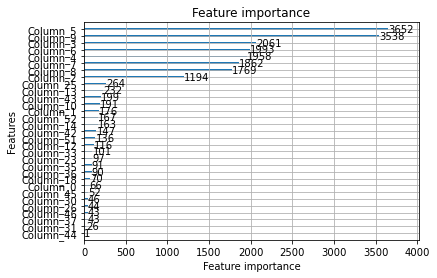

In [32]:
import matplotlib.pyplot as plt

# 绘制特征的相对重要性
lgb.plot_importance(model)
plt.show()

In [34]:
# 可视化lgb分割过程
img = lgb.create_tree_digraph(model)

In [35]:
type(img)

graphviz.dot.Digraph